## Wiki data impute test
- Wiki data have missing values especially for unpopular projects.
- Things have tried before: 1. pad the missing values to be 0s 2. leave them as NULL so they are not taken account in the RNN model training.
- Here we see how different imputation looks like.

In [1]:
import time
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import heapq

In [2]:
# important window definition
prediction_length = 48
context_length = 72
day = 24
week = 148
month = 720
year = 8760

In [3]:
# get the Time Series data and corresponding wiki project name
def get_ts(data_location,label_location,freq):
    df_ts = pd.read_json(data_location, lines=True)
    num_pt = min(len(df_ts.iloc[1, 1]), 100000)
    print('use first ', num_pt, ' points in a time series')
    num_ts = len(df_ts)

    time_series_wiki = []
    for k in range(num_ts):
        t0 = df_ts.iloc[k, 0]
        data = df_ts.iloc[k, 1][:num_pt]
        index = pd.DatetimeIndex(start=t0, freq=freq, periods=num_pt)
        time_series_wiki.append(pd.Series(data=data, index=index))
        
    with open(label_location) as f:
        wp_list = f.read().splitlines()  
        
    return time_series_wiki, wp_list

In [4]:
label_location = 'wp_full-20180101-20190101_get.txt'    
data_location = 'test_1year.json'
freq = 'H'

time_series_wiki, wp_list = get_ts(data_location,label_location,freq)

use first  8784  points in a time series


In [5]:
tm = time_series_wiki[12]

mean = 0.4929417122040073  std = 5.00273820486491


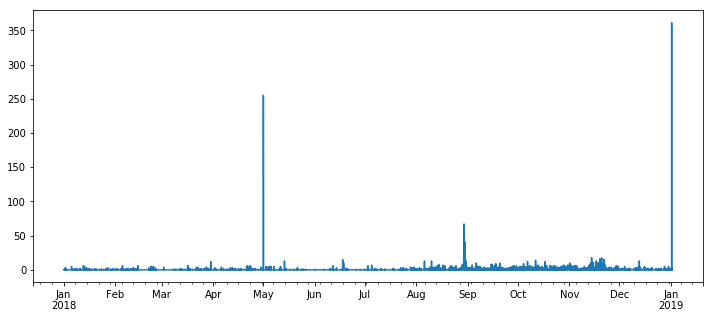

In [6]:
tm.plot(figsize = (12,5))
print('mean = {}'.format(tm.mean()), ' std = {}'.format(tm.std()))

In [7]:
print('total zero values',(tm == 0).sum(), ' length ', len(tm))
tm

total zero values 7470  length  8784


2018-01-01 00:00:00      0
2018-01-01 01:00:00      0
2018-01-01 02:00:00      0
2018-01-01 03:00:00      0
2018-01-01 04:00:00      0
2018-01-01 05:00:00      0
2018-01-01 06:00:00      0
2018-01-01 07:00:00      0
2018-01-01 08:00:00      0
2018-01-01 09:00:00      0
2018-01-01 10:00:00      0
2018-01-01 11:00:00      0
2018-01-01 12:00:00      0
2018-01-01 13:00:00      0
2018-01-01 14:00:00      0
2018-01-01 15:00:00      1
2018-01-01 16:00:00      0
2018-01-01 17:00:00      1
2018-01-01 18:00:00      2
2018-01-01 19:00:00      0
2018-01-01 20:00:00      0
2018-01-01 21:00:00      0
2018-01-01 22:00:00      0
2018-01-01 23:00:00      0
2018-01-02 00:00:00      0
2018-01-02 01:00:00      3
2018-01-02 02:00:00      0
2018-01-02 03:00:00      0
2018-01-02 04:00:00      0
2018-01-02 05:00:00      0
                      ... 
2018-12-31 18:00:00      0
2018-12-31 19:00:00      0
2018-12-31 20:00:00      0
2018-12-31 21:00:00      2
2018-12-31 22:00:00      0
2018-12-31 23:00:00      0
2

In [8]:
tm_null = tm.replace(to_replace=0, value=np.nan, inplace = False)

In [10]:
tm_null.isnull().sum()

7470

In [11]:
tm_fillmean = tm_null.fillna(value = tm_null.mean())

In [13]:
tm_fillfw = tm_null.fillna(method = 'ffill')

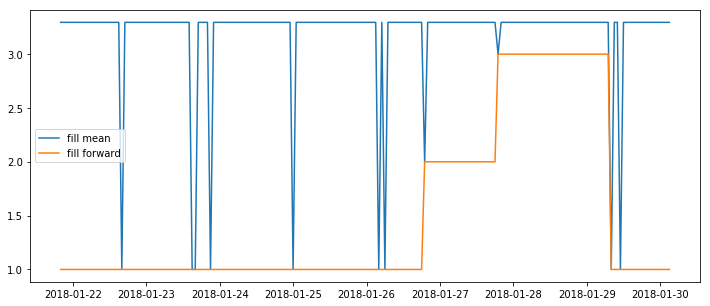

In [19]:
plt.figure(figsize = (12,5))
plt.plot(tm_fillmean[500:700], label = 'fill mean')
plt.plot(tm_fillfw[500:700], label = 'fill forward')
plt.legend(loc = 'best')